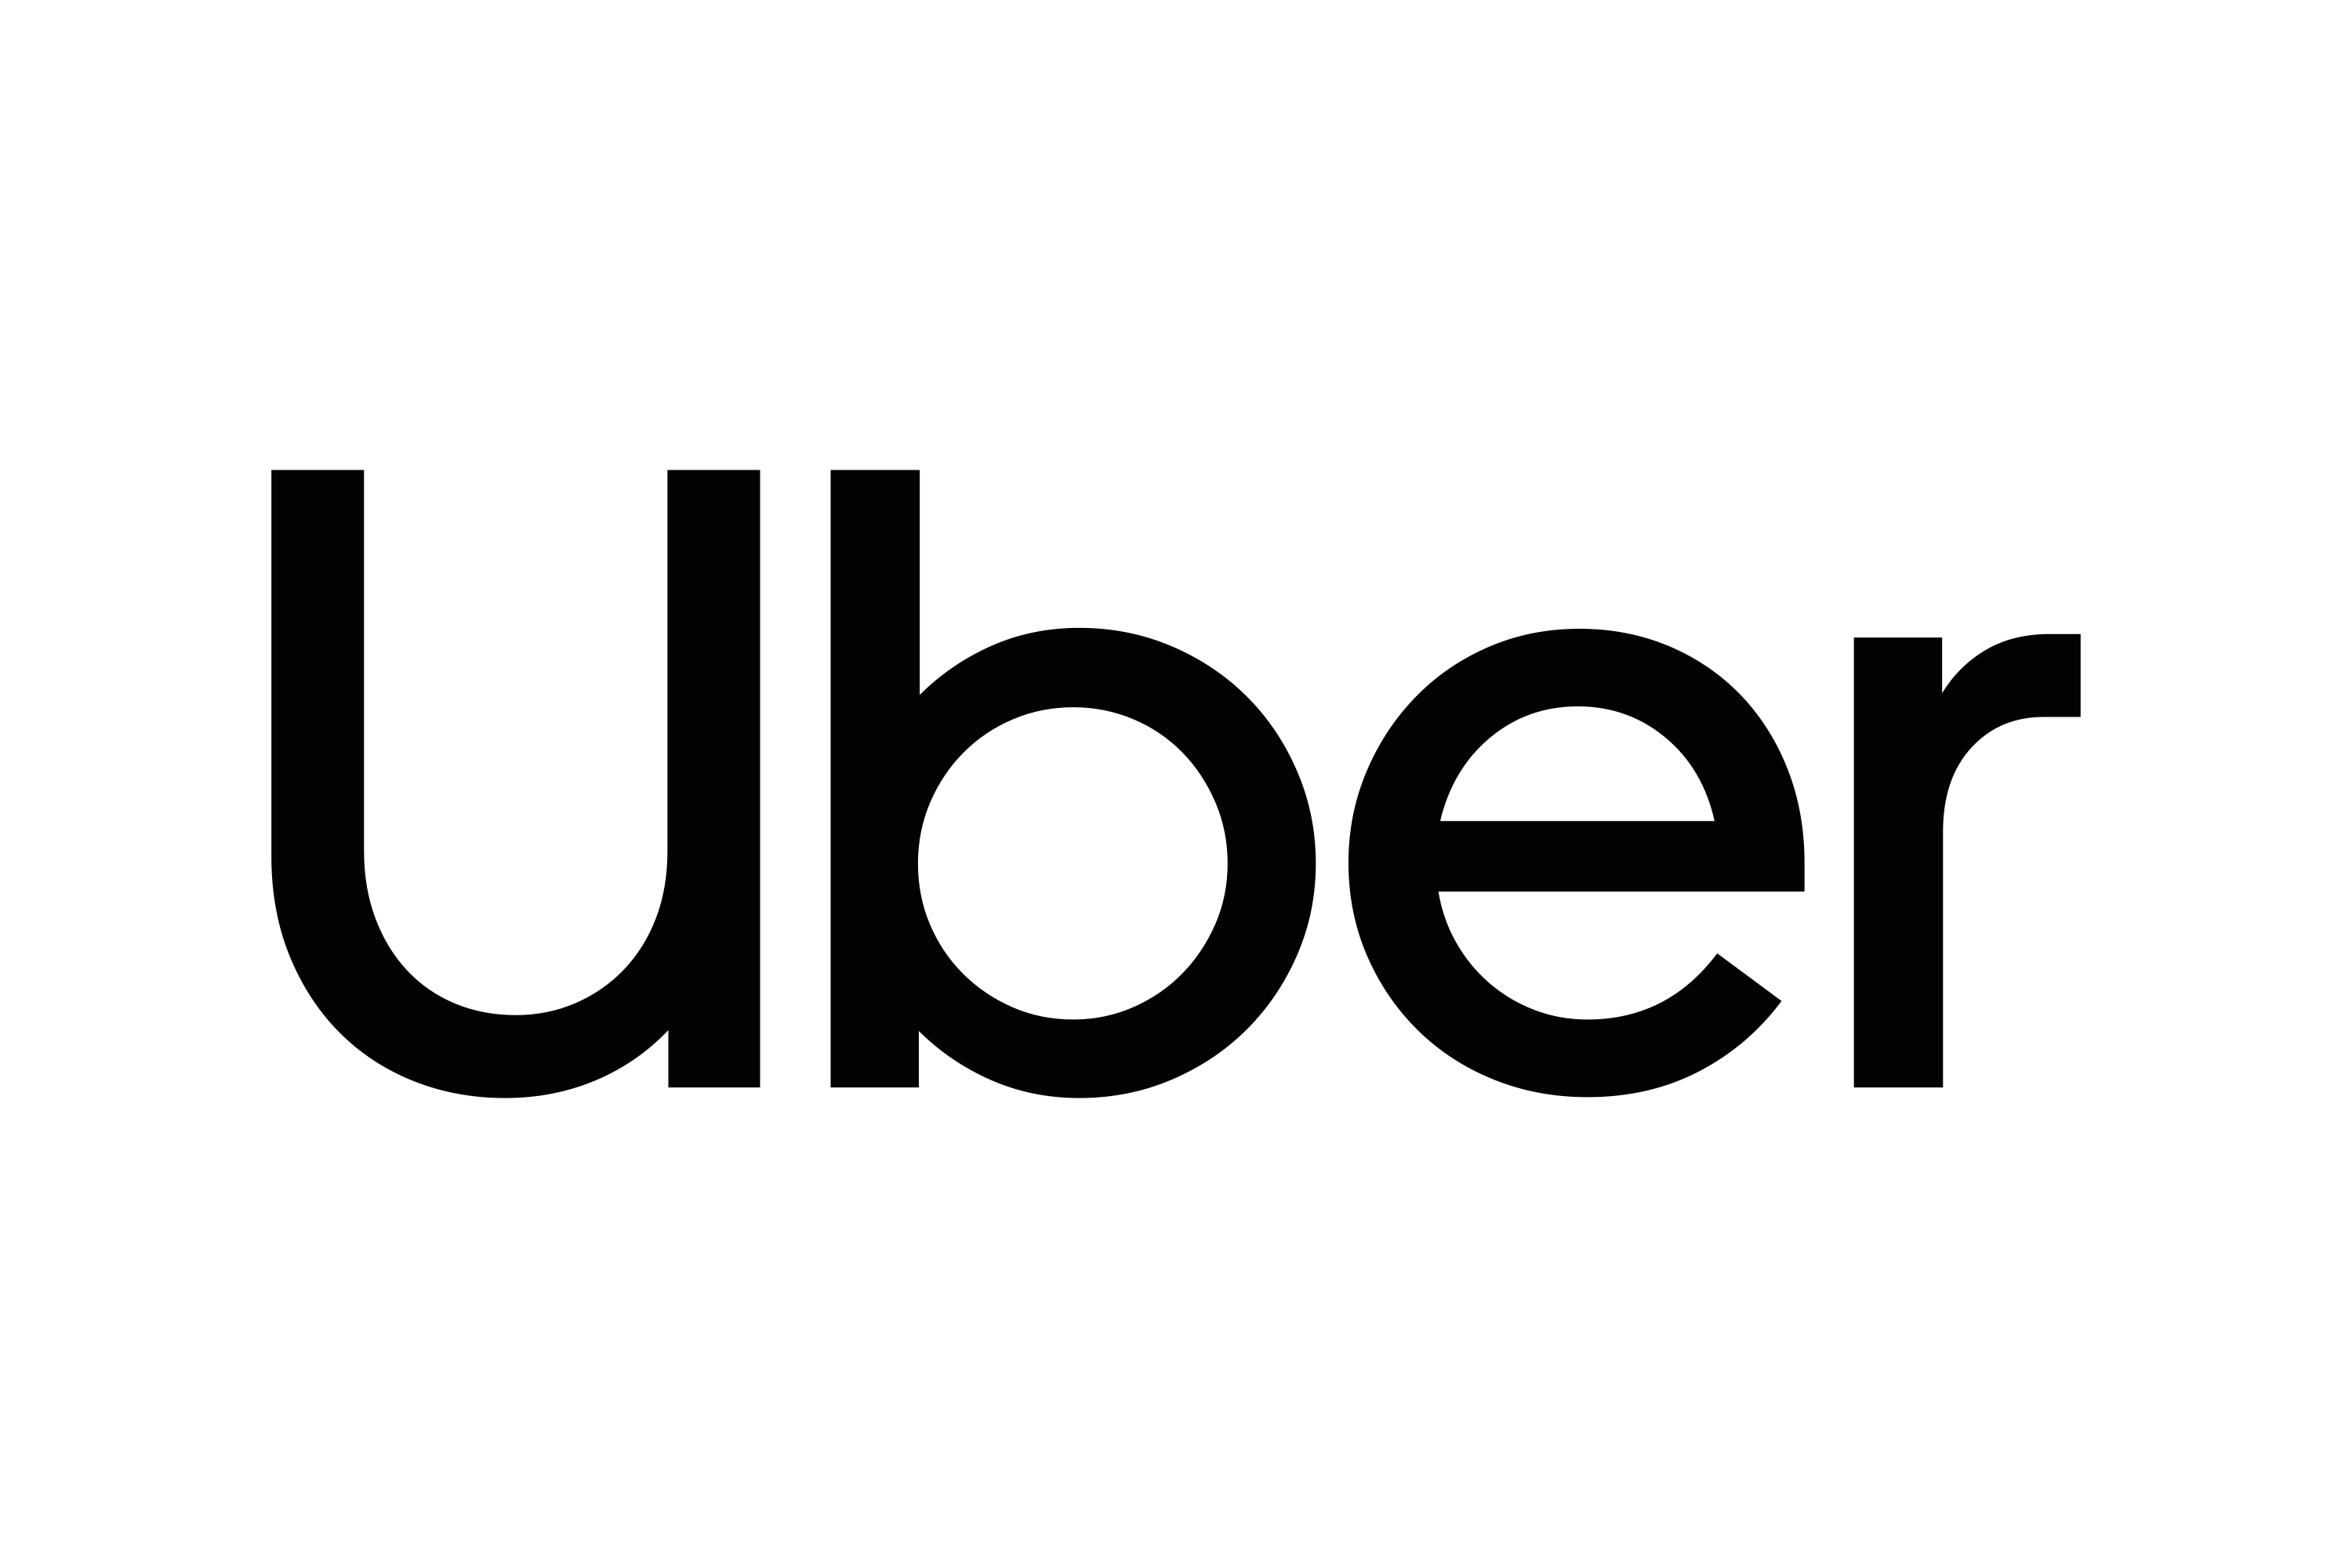

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




url = "https://github.com/Taj1920/Data_Analysis/raw/refs/heads/main/Uber_Analysis/UberDataset.csv"
df = pd.read_csv(url,encoding="ISO-8859-1")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [37]:
# handling the Nan values in PURPOSE column
df['PURPOSE'].isnull().sum()
df['PURPOSE']=df['PURPOSE'].fillna("Unknown")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [38]:
# Drop Nan values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [39]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [40]:
# reset the index
df.reset_index(inplace=True)
df=df.drop("index",axis=1)
df


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1149,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1150,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1151,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1152,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [41]:
# handling START column
# for i in df['START'].unique():
#   if '?' in i:
#     print(i)

df['START']=df['START'].str.replace('R?walpindi','Rawalpindi')
df['START']=df['START'].str.replace('Kar?chi','Karachi')
df['START'].unique()



array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'Rawalpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven

In [42]:
# handling STOP column
df['STOP']=df['STOP'].str.replace('R?walpindi','Rawalpindi')
df['STOP']=df['STOP'].str.replace('Kar?chi','Karachi')
df['STOP'].unique()


array(['Fort Pierce', 'West Palm Beach', 'Palm Beach', 'Cary',
       'Morrisville', 'New York', 'Queens', 'East Harlem', 'NoMad',
       'Midtown', 'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Queens County', 'Gulfton', 'Downtown',
       'Houston', 'Jamestown Court', 'Durham', 'Whitebridge',
       'Lake Wellingborough', 'Raleigh', 'Umstead', 'Hazelwood',
       'Westpark Place', 'Meredith Townes', 'Leesville Hollow', 'Apex',
       'Chapel Hill', 'Williamsburg Manor', 'Macgregor Downs',
       'Edgehill Farms', 'Northwoods', 'Tanglewood', 'Preston',
       'Walnut Terrace', 'Jackson Heights', 'East Elmhurst',
       'Midtown West', 'Long Island City', 'Jamaica', 'Unknown Location',
       'Colombo', 'Nugegoda', 'Katunayaka', 'Islamabad', 'Rawalpindi',
       'Noorpur Shahan', 'Heritage Pines', 'Waverly Place', 'Wayne Ridge',
       'Depot Historic District', 'Weston', 'West University',
       'South Congress', 'Arts District', 'Congress Ave District

**FEATURE ENGINEERING**

In [43]:
# REPLACE '/' TO '-'
df['START_DATE']=df['START_DATE'].str.replace("/","-")
df['END_DATE']=df['END_DATE'].str.replace("/","-")
df.info()

# covert to datetime datatype
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1154 non-null   object 
 1   END_DATE    1154 non-null   object 
 2   CATEGORY    1154 non-null   object 
 3   START       1154 non-null   object 
 4   STOP        1154 non-null   object 
 5   MILES       1154 non-null   float64
 6   PURPOSE     1154 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1154 non-null   datetime64[ns]
 1   END_DATE    1154 non-null   datetime64[ns]
 2   CATEGORY    1154 non-null   object        
 3   START       1154 non-null   object        
 4   STOP        1154 non-null   object        
 5   MILES       1154 non-null

In [44]:
# separate Date and Time columns
df['DATE']=df['START_DATE'].dt.date
df['TIME']=df['START_DATE'].dt.hour
df

# Time---> Moring,Afternoon,Evening,Night
# New col----> DAY-NIGHT
# moring----> 0 to 10
# Afternoon----> 11 to 15
# Evening---> 16 to 19
# Night---> 20 to 24
out=[]
for i in df['TIME']:
  if 0<=i<=10:
    out.append("Morning")
  elif 11<=i<=15:
    out.append("Afternoon")
  elif 16<=i<=19:
    out.append("Evening")
  else:
    out.append("Night")
df['DAY-NIGHT']=out




In [45]:
# create DAY column
df['DAY']=df['START_DATE'].dt.weekday
d={0:'Mon',1:'Tue',2:'Wed',3:'Thr',4:'Fri',5:'Sat',6:'Sun'}
df['DAY']=df['DAY'].map(d)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,1,Morning,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,Wed
...,...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,2016-12-31,1,Morning,Sat
1150,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,2016-12-31,13,Afternoon,Sat
1151,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15,Afternoon,Sat
1152,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21,Night,Sat


In [46]:
# create a month column

df['MONTH']=df['START_DATE'].dt.month
a={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['MONTH']=df['MONTH'].map(a)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY-NIGHT,DAY,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,Fri,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,1,Morning,Sat,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,Sat,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,Tue,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,Wed,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,2016-12-31,1,Morning,Sat,Dec
1150,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,2016-12-31,13,Afternoon,Sat,Dec
1151,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15,Afternoon,Sat,Dec
1152,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21,Night,Sat,Dec


In [47]:
# save cleaned data
df.to_csv('cleand_Uber_data.csv')

**DATA VISUALIZATION**

In [48]:
def data_label(a):
  for i in a.containers:
    a.bar_label(i)

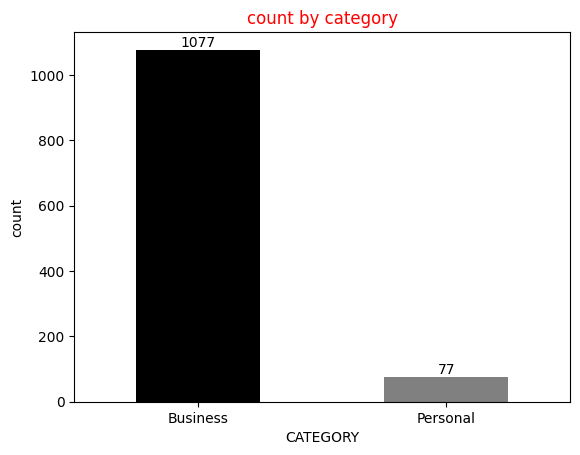

In [49]:
# count the CATEGORY column
a=sns.countplot(x='CATEGORY',data=df,hue="CATEGORY",palette=["black","gray"],width=0.5)
plt.title("count by category",color="red")
data_label(a)

**Most of the rides has booked for business category than personal.**

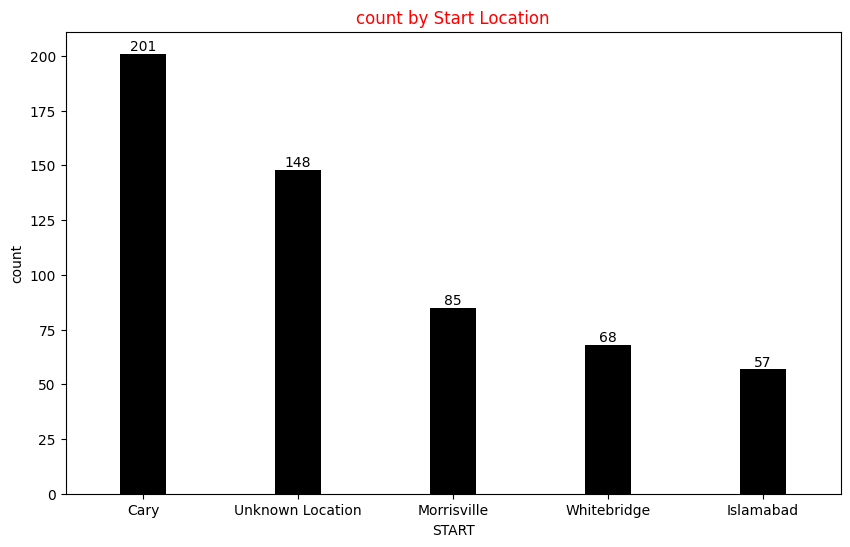

In [50]:
# count the START
plt.figure(figsize=(10,6))
data = df["START"].value_counts()
data = pd.DataFrame(data[data>50]).reset_index()
# why we use rest_index() bcoz when we create data>50 where index also create so to remove that
a = sns.barplot(x="START",y="count",data=data,width=0.3,color='black')
plt.title("count by Start Location",color='red')
data_label(a)



**Most of the bookings are from cary compared to other locations**

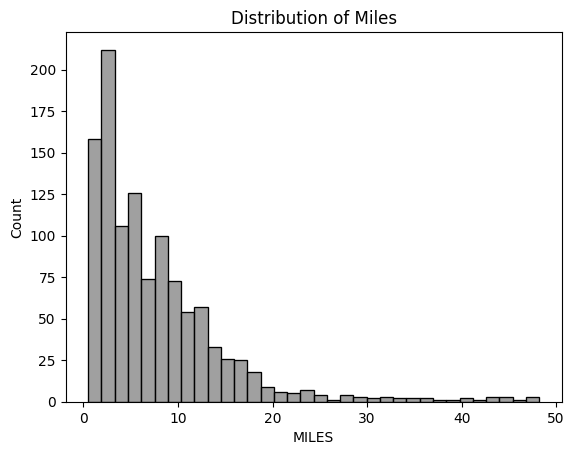

In [51]:
# Distrubution of Miles
sns.histplot(x='MILES',data=df[df["MILES"]<50],color='gray')
plt.title("Distribution of Miles")
plt.show()

**Most of the rides are for 0 to 20 miles.**

**Rides count is negligible from more than 20 miles.**

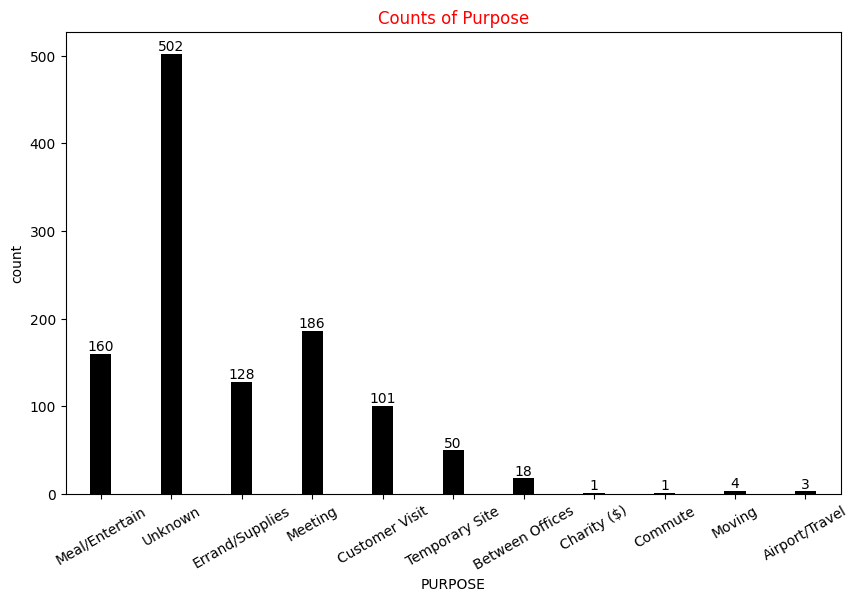

In [52]:
# Count for purpose
plt.figure(figsize=(10,6))
a=sns.countplot(x='PURPOSE',data=df,width=0.3,color='black')
plt.title('Counts of Purpose',color='red')
plt.xticks(rotation=30)
data_label(a)

**People are liking to book the rides for Meal/Entertain,Errand/Supplies,meetings,customer visits.**

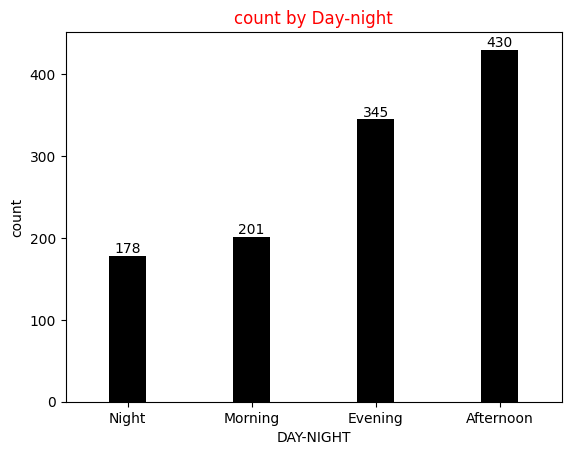

In [53]:
#count by DAY-NIGHT
a = sns.countplot(x="DAY-NIGHT",data=df,width=0.3,color='black')
plt.title("count by Day-night",color='red')
data_label(a)

**Most of the bookings are at Afternoon and Evening**

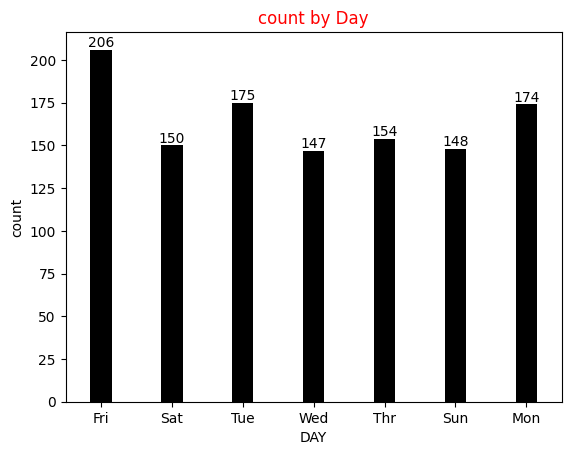

In [54]:
# count by DAY
a=sns.countplot(x='DAY',data=df,width=0.3,color='black')
plt.title("count by Day",color='red')
data_label(a)

**Most of the bookings are on Fri,Sat,Mon**

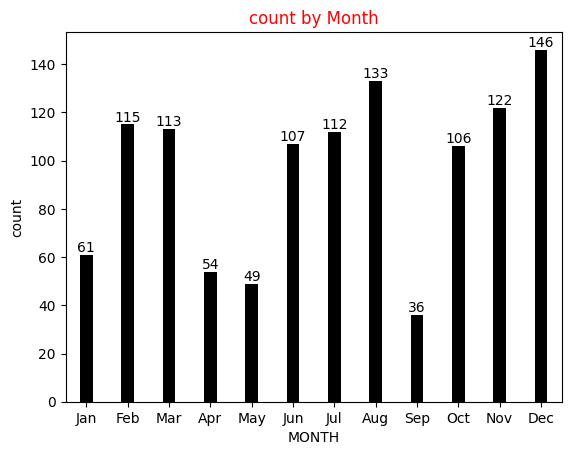

In [55]:
# Count by Month
a=sns.countplot(x='MONTH',data=df,width=0.3,color='black')
plt.title("count by Month",color='red')
data_label(a)

**Most of the bookings are in Dec,Nov,Aug**